# Basic Imports


In [62]:
import numpy as np
import os 
import cv2


# Load the images

In [63]:
images =  []
labels = []

path=r'C:\Users\Dogo\Documents\Machine Learning\agyikepek_3_osztaly\agyikepek_3_osztaly\kepek'

for image in os.listdir(path):
    if image.split("_")[-1].__contains__("1"):
        label = "glioma"
    elif image.split("_")[-1].__contains__("2"):
        label = "meningioma"
    else :
        label ="pituitary"
    
    img_path = os.path.join(path,image)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224,224))

    images.append(img)
    labels.append(label)




# Plot few images

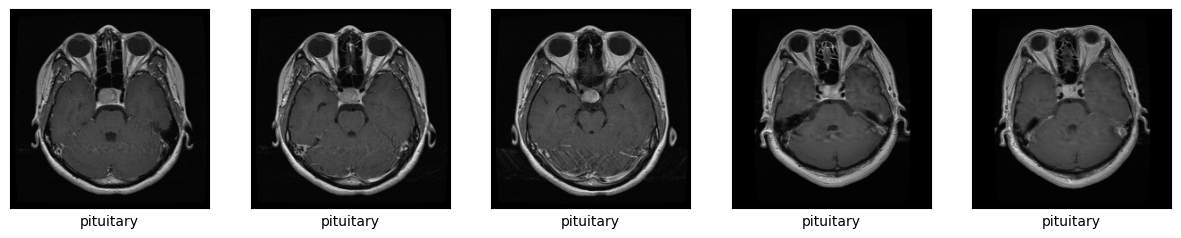

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
    plt.xlabel(labels[i])
plt.show()


# Preprocessing

In [65]:
from sklearn.preprocessing import LabelEncoder
images = np.array(images)
labels = np.array(labels)

normalized_images = images/255.0

lb = LabelEncoder()

encoded_labels = np.array(lb.fit_transform(labels))

mapped_classes = dict(zip(lb.classes_, range(len(lb.classes_))))
print (mapped_classes)

{'glioma': 0, 'meningioma': 1, 'pituitary': 2}


# Model selection

In [66]:
from sklearn.model_selection import train_test_split

flat_images = normalized_images.reshape(normalized_images.shape[0],-1)

train_images, test_images, train_labels, test_labels = train_test_split(flat_images,encoded_labels, random_state=42, train_size=0.8)

train_images.shape,test_images.shape,train_labels.shape,test_labels.shape

((2451, 150528), (613, 150528), (2451,), (613,))

### Metric evaluation

In [83]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay 

def Evaluate_metrics (y_test, y_pred,classes):
    accuracy = accuracy_score(y_test,y_pred)
    class_report = classification_report(y_test,y_pred)
    cm =confusion_matrix(y_test,y_pred)

    
        
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes.keys())
    disp.plot()

    
    print(f"Accuracy score:{accuracy}")
    print(f"Class report:{class_report}")

## Basic KNN

Accuracy score:0.8939641109298532
Class report:              precision    recall  f1-score   support

           0       0.95      0.63      0.76       153
           1       0.83      0.97      0.89       273
           2       0.98      0.99      0.98       187

    accuracy                           0.89       613
   macro avg       0.92      0.87      0.88       613
weighted avg       0.90      0.89      0.89       613

[0 1 2]


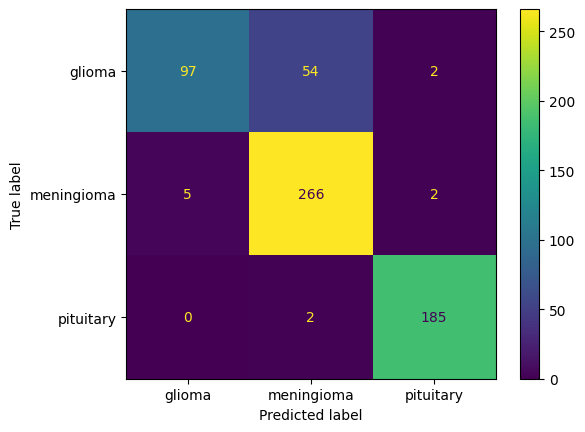

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3)

KNN.fit(train_images,train_labels)

pred_labels =KNN.predict(test_images)

Evaluate_metrics(test_labels, pred_labels,mapped_classes)

## Basic Random forest

Accuracy score:0.9477977161500816
Class report:              precision    recall  f1-score   support

           0       0.89      0.92      0.90       153
           1       0.97      0.93      0.95       273
           2       0.97      0.99      0.98       187

    accuracy                           0.95       613
   macro avg       0.94      0.95      0.94       613
weighted avg       0.95      0.95      0.95       613



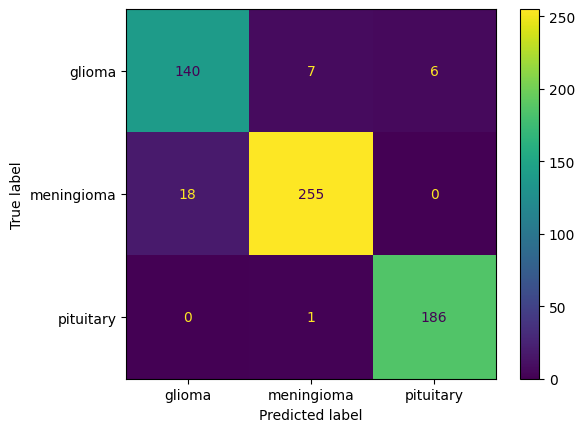

In [85]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100,random_state=42)

RF.fit(train_images,train_labels)

pred_labels = RF.predict(test_images)

Evaluate_metrics(test_labels,pred_labels,mapped_classes)

## PCA decompisition

In [90]:
from sklearn.decomposition import PCA

pca = PCA (n_components=0.8)
train_images_pca = pca.fit_transform(train_images)
test_images_pca = pca.transform(test_images)

### KNN with PCA

Accuracy score:0.8988580750407831
Class report:              precision    recall  f1-score   support

           0       0.96      0.63      0.76       153
           1       0.83      0.98      0.90       273
           2       0.98      1.00      0.99       187

    accuracy                           0.90       613
   macro avg       0.92      0.87      0.88       613
weighted avg       0.91      0.90      0.89       613



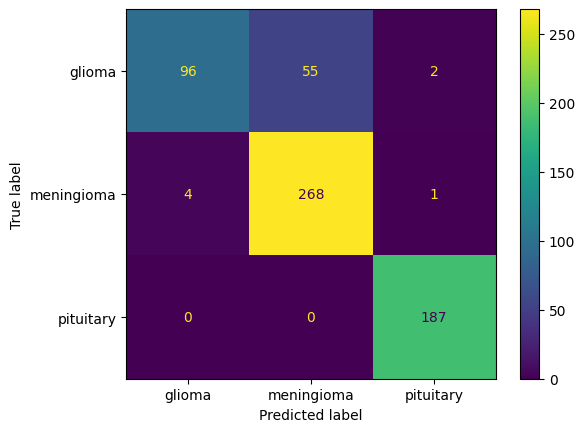

In [91]:
KNN = KNeighborsClassifier(n_neighbors=3)

KNN.fit(train_images_pca,train_labels)

pred_labels =KNN.predict(test_images_pca)

Evaluate_metrics(test_labels, pred_labels,mapped_classes)

### Random forest with PCA

Accuracy score:0.8270799347471451
Class report:              precision    recall  f1-score   support

           0       0.96      0.42      0.58       153
           1       0.74      0.98      0.84       273
           2       0.96      0.94      0.95       187

    accuracy                           0.83       613
   macro avg       0.88      0.78      0.79       613
weighted avg       0.86      0.83      0.81       613



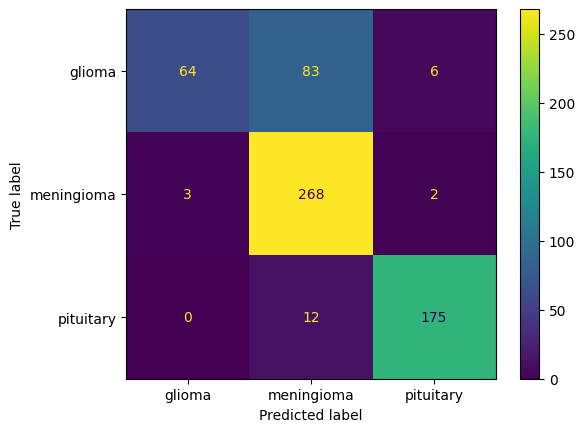

In [92]:
RF = RandomForestClassifier(n_estimators=100,random_state=42)

RF.fit(train_images_pca,train_labels)

pred_labels = RF.predict(test_images_pca)

Evaluate_metrics(test_labels,pred_labels,mapped_classes)